C:\Users\Krystian\AppData\Local\Temp\ipykernel_14980\2081359104.py:78: RuntimeWarning: overflow encountered in ubyte_scalars
  H = math.acos((R - 0.5*G - 0.5*B)/(math.sqrt(R**2 + G**2 + B**2 - R*G - R*B - G*B)))
C:\Users\Krystian\AppData\Local\Temp\ipykernel_14980\2081359104.py:80: RuntimeWarning: overflow encountered in ubyte_scalars
  H = 360 - math.acos((R - 0.5*G - 0.5*B)/(math.sqrt(R**2 + G**2 + B**2 - R*G - R*B - G*B)))


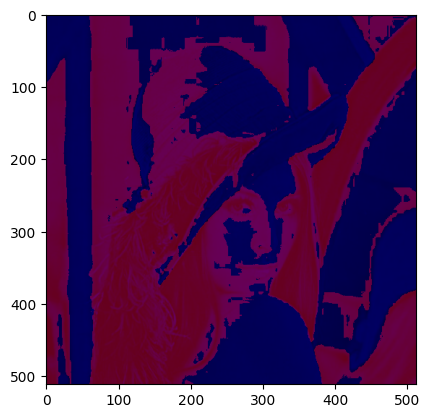

In [18]:
import numpy as np
from enum import Enum
from matplotlib.image import imread
from matplotlib.image import imsave
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import math
import copy

image = imread('./lena.jpg')

#r_layer, g_layer, b_layer = np.squeeze(np.dsplit(image, image.shape[-1]))
img_tab = []
img_tab = np.squeeze(np.dsplit(image, image.shape[-1]))

#
# img_tabrgb = copy.copy(img_tabhsi)
#
# for x in range(img_tab.shape[1]):
#     for y in range(img_tab.shape[2]):
#         H = img_tabhsi[0][x][y]
#         S = img_tabhsi[1][x][y]
#         I = img_tabhsi[2][x][y]
#
#
#         if (H == 0):
#             R = I + 2*I*S
#             G = I - I*S
#             B = I - I*S
#         elif (H > 0 and H < 120):
#             R = I + I*S * math.cos(H)/math.cos(60-H)
#             G = I + I*S*(1-math.cos(H)/math.cos(60-H))
#             B = I - I*S
#         elif (H==120):
#             R = I - I*S
#             G = I + 2*I*S
#             B = I-I*S
#         elif (H > 120 and H < 240):
#             R = I - I*S
#             G = I + I*S*math.cos(H-120)/math.cos(180-H)
#             B = I + I*S*(math.cos(H-120)/math.cos(180-H))
#         elif (H==240):
#             R = I - I*S
#             G = I - I*S
#             B = I + 2*I*S
#         else:
#             R = I + I*S*(math.cos(H-240)/math.cos(300-H))
#             G = I - I*S
#             B = I + I*S*math.cos(H-240)/math.cos(300-H)
#
#         img_tabrgb[0][x][y] = R
#         img_tabrgb[1][x][y] = G
#         img_tabrgb[2][x][y] = B
#
#
# img_stacked_layers = np.dstack((img_tabrgb[0], img_tabrgb[1], img_tabrgb[2]))
# imshow(img_stacked_layers)

img_tabhsl = copy.copy(img_tab)

for x in range(img_tab.shape[1]):
    for y in range(img_tab.shape[2]):
        R = img_tab[0][x][y]
        G = img_tab[1][x][y]
        B = img_tab[2][x][y]

        M = max(R, G, B)
        m = min(R, G, B)

        L = M / 255

        if (M > 0):
            S = 1 - m/M
        else:
            S = 0

        if (G >= B):
            H = math.acos((R - 0.5*G - 0.5*B)/(math.sqrt(R**2 + G**2 + B**2 - R*G - R*B - G*B)))
        else:
            H = 360 - math.acos((R - 0.5*G - 0.5*B)/(math.sqrt(R**2 + G**2 + B**2 - R*G - R*B - G*B)))

        img_tabhsl[0][x][y] = H
        img_tabhsl[1][x][y] = S
        img_tabhsl[2][x][y] = L * 100

imghsl_stacked = np.dstack((img_tabhsl[0], img_tabhsl[1], img_tabhsl[2]))

imshow(imghsl_stacked)
